<h1 style="text-align: center; color: #fff; background: linear-gradient(90deg, #7b2ff2 0%, #f357a8 100%); padding: 2rem 0; border-radius: 1rem; box-shadow: 0 4px 16px #0002; letter-spacing: 0.1em;">
    AYUDANTIA 6 - REPASO I1

</h1>
<div style="text-align: center; margin: 1rem 0;">
    <img src="massu.jpeg" alt="Massu" style="width: 200px; height: auto;">
    <p style="font-style: italic; color: #555;">Massú después de un partido de 5 horas que clasifico a Chile al grupo mundial de la Copa Davis</p>
    </div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<section style="padding: 2rem; background: #979797ff; border-radius: 1rem; box-shadow: 0 2px 8px #0001; margin-bottom: 2rem;">
    <h2 style="color: #4b4d65ff; text-align: center; margin-bottom: 1.5rem;">
        Exploración de Datos de Partidos de Tenis
    </h2>
    <p style="font-size: 1.1rem; color: #222; margin-bottom: 1.2rem;">
        Hoy vamos a explorar un set de datos de partidos de tenis. El dataset contiene información de partidos de tenis desde <strong>1991 hasta 2016</strong>, incluyendo detalles como el torneo, los jugadores, el resultado del partido y estadísticas adicionales.
    </p>
    <p style="font-size: 1.1rem; color: #222; margin-bottom: 1.2rem;">
        La idea es que ocupemos la mayoría de las cosas que se han visto a lo largo del curso, y que serán de utilidad para la prueba.
    </p>
    <p style="font-size: 1.1rem; color: #222; margin-bottom: 1.2rem;">
        Los datasets los obtuvimos de 
        <a href="https://datahub.io/core/atp-world-tour-tennis-data#match_scores_1991-2016_unindexed" target="_blank" style="color: #965074ff; text-decoration: underline;">
            este enlace
        </a>.
    </p>
    <div style="background: #646464ff; border-radius: 0.5rem; padding: 1rem 1.5rem; border-left: 4px solid #2d2b56ff; margin-bottom: 1.2rem; width: 70%;">
        <strong>Ocuparemos los archivos:</strong>
        <ul style="margin-top: 0.5rem; margin-bottom: 0;">
            <li style="margin-bottom: 0.3rem;"><code>matches.csv</code></li>
            <li><code>players.csv</code></li>
        </ul>
    </div>
    <p style="font-size: 1.1rem; color: #222; margin-bottom: 0;">
        <strong>¡Comencemos!</strong>
    </p>
</section>

In [2]:
data = pd.read_csv("matches.csv")
data.head()

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Finals,1,1,Nicklas Kulti,k181,nicklas-kulti,...,6,63 16 62,2,1,13,11,0,0,1991-7308-k181-s351,/en/scores/1991/7308/MS001/match-stats
1,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Semi-Finals,2,1,Michael Stich,s351,michael-stich,...,2,64 76(6),2,0,13,10,1,0,1991-7308-s351-c243,/en/scores/1991/7308/MS003/match-stats
2,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Semi-Finals,2,2,Nicklas Kulti,k181,nicklas-kulti,...,NaN,75 64,2,0,13,9,0,0,1991-7308-k181-l206,/en/scores/1991/7308/MS002/match-stats
3,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Quarter-Finals,3,1,Jim Courier,c243,jim-courier,...,Q,76(3) 63,2,0,13,9,1,0,1991-7308-c243-s367,/en/scores/1991/7308/MS007/match-stats
4,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Quarter-Finals,3,2,Michael Stich,s351,michael-stich,...,NaN,36 63 63,2,1,15,12,0,0,1991-7308-s351-a031,/en/scores/1991/7308/MS006/match-stats


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95359 entries, 0 to 95358
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   tourney_year_id         95359 non-null  object
 1   tourney_order           95359 non-null  int64 
 2   tourney_slug            95359 non-null  object
 3   tourney_url_suffix      95359 non-null  object
 4   tourney_round_name      95359 non-null  object
 5   round_order             95359 non-null  int64 
 6   match_order             95359 non-null  int64 
 7   winner_name             95359 non-null  object
 8   winner_player_id        95359 non-null  object
 9   winner_slug             95359 non-null  object
 10  loser_name              95359 non-null  object
 11  loser_player_id         95359 non-null  object
 12  loser_slug              95359 non-null  object
 13  winner_seed             54893 non-null  object
 14  loser_seed              43165 non-null  object
 15  ma

In [4]:
data['tourney_slug'].unique()

array(['adelaide', 'wellington', 'auckland', 'sydney', 'australian-open',
       'maceio', 'milan', 'san-jose', 'brussels', 'philadelphia',
       'memphis', 'stuttgart', 'chicago', 'rotterdam', 'copenhagen',
       'indian-wells', 'miami', 'oeiras', 'hong-kong', 'atlanta',
       'barcelona', 'tokyo', 'seoul', 'monte-carlo', 'singapore',
       'madrid', 'munich', 'tampa', 'houston', 'hamburg', 'rome', 'umag',
       'bologna', 'dusseldorf', 'roland-garros', 'oporto', 'london',
       's-hertogenbosch', 'kitzbuhel', 'manchester', 'wimbledon',
       'bastad', 'gstaad', 'newport', 'washington', 'amersfoort',
       'montreal', 'los-angeles', 'warsaw', 'cincinnati', 'prague',
       'indianapolis', 'new-haven', 'long-island', 'schenectady',
       'us-open', 'brasilia', 'geneva', 'basel', 'palermo', 'athens',
       'toulouse', 'ostrava', 'tel-aviv', 'bolton', 'lyon', 'vienna',
       'guaruja', 'stockholm', 'buzios', 'paris', 'antwerp', 'moscow',
       'sao-paulo', 'nitto-atp-finals',

Vamos a filtrar los datos para quedarnos solo con los partidos de Grand Slam y luego hacer un análisis exploratorio de los datos. 

In [5]:
grand_slams = data.copy()
grand_slams = grand_slams[grand_slams['tourney_slug'].isin(['australian-open', 'roland-garros', 'wimbledon', 'us-open'])]
grand_slams.head()

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
124,1991-580,5,australian-open,/en/scores/archive/australian-open/580/1991/re...,Finals,1,1,Boris Becker,b028,boris-becker,...,3,16 64 64 64,3,1,19,18,0,0,1991-580-b028-l018,/en/scores/1991/580/MS001/match-stats
125,1991-580,5,australian-open,/en/scores/archive/australian-open/580/1991/re...,Semi-Finals,2,1,Ivan Lendl,l018,ivan-lendl,...,1,64 57 36 76(3) 64,3,2,27,27,1,0,1991-580-l018-e004,/en/scores/1991/580/MS002/match-stats
126,1991-580,5,australian-open,/en/scores/archive/australian-open/580/1991/re...,Semi-Finals,2,2,Boris Becker,b028,boris-becker,...,NaN,67(2) 64 61 64,3,1,24,16,0,1,1991-580-b028-m048,/en/scores/1991/580/MS003/match-stats
127,1991-580,5,australian-open,/en/scores/archive/australian-open/580/1991/re...,Quarter-Finals,3,1,Stefan Edberg,e004,stefan-edberg,...,NaN,62 63 62,3,0,18,7,0,0,1991-580-e004-y017,/en/scores/1991/580/MS004/match-stats
128,1991-580,5,australian-open,/en/scores/archive/australian-open/580/1991/re...,Quarter-Finals,3,2,Boris Becker,b028,boris-becker,...,10,62 76 63,3,0,19,11,1,0,1991-580-b028-f035,/en/scores/1991/580/MS007/match-stats


In [6]:

grand_slams['tourney_slug'].value_counts()

tourney_slug
australian-open    4422
roland-garros      4422
wimbledon          4422
us-open            4422
Name: count, dtype: int64

Vamos a quedarnos con las columnas que nos interesan: 'tourney_slug', 'winner_name', 'loser_name', 'winner_sets_won', 'loser_sets_won', 'winner_games_won', 'loser_games_won'. Y vamos quedarnos con el año tambien pero tenemos que editar la columna "tourney_year_id". 

In [7]:
grand_slams = grand_slams[['tourney_year_id', 'tourney_slug','tourney_round_name', 'winner_name', 'loser_name', 'winner_sets_won', 'loser_sets_won', 'winner_games_won', 'loser_games_won','match_stats_url_suffix']]
grand_slams['year'] = grand_slams['tourney_year_id'].apply(lambda x : int(x.split('-')[0]))
grand_slams = grand_slams.drop(columns=['tourney_year_id'])
grand_slams.head()

,tourney_slug,tourney_round_name,winner_name,loser_name,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,match_stats_url_suffix,year
124,australian-open,Finals,Boris Becker,Ivan Lendl,3,1,19,18,/en/scores/1991/580/MS001/match-stats,1991
125,australian-open,Semi-Finals,Ivan Lendl,Stefan Edberg,3,2,27,27,/en/scores/1991/580/MS002/match-stats,1991
126,australian-open,Semi-Finals,Boris Becker,Patrick McEnroe,3,1,24,16,/en/scores/1991/580/MS003/match-stats,1991
127,australian-open,Quarter-Finals,Stefan Edberg,Jaime Yzaga,3,0,18,7,/en/scores/1991/580/MS004/match-stats,1991
128,australian-open,Quarter-Finals,Boris Becker,Guy Forget,3,0,19,11,/en/scores/1991/580/MS007/match-stats,1991


<section style="max-width: 100%; margin: 2rem auto; padding: 2rem; background: linear-gradient(90deg, #868688ff 0%, #363143ff 100%); border-radius: 1rem; box-shadow: 0 4px 16px #0002;">
    <div style="background: #2a2a29; border-radius: 0.7rem; border-left: 5px solid #626283ff; padding: 1.5rem 2rem; color: #fff; width: 90%; margin: 0 auto;">
        <span style="font-style: italic; display: block; margin-bottom: 1rem;">
            <strong style="padding-right: 10px; color: #ee11ff;">Nota:</strong>
            Si no recuerdas cómo hacer alguna de las cosas que hemos hecho en clase, revisa los notebooks de las clases anteriores o la documentación de pandas.
        </span>
        <h3 style="color: #fff; margin-top: 1.5rem; margin-bottom: 1rem; letter-spacing: 0.03em;">
            Ahora, poniéndonos en una situación de prueba, contestemos las siguientes preguntas (PARTE 1):
        </h3>
        <ol style="font-size: 1.08rem; color: #f3eaff; margin-left: 1.2rem;">
            <li style="margin-bottom: 0.7rem;">
                Obtenga el nombre del ganador de cada Grand Slam de cada año. [4 por año] en el siguiente formato:<br>
                <span style="color: #ffe066;">Año - Torneo - Ganador</span> Ej: <em>2023 - Australian Open - Novak Djokovic</em> <span style="color: #ee11ff;">[guardarlo en un archivo .txt]</span>
                <ul style="margin-top: 0.5rem;">
                    <li>¿Quién ha ganado más torneos en el período de tiempo cubierto por los datos?</li>
                    <li>¿Quién ha ganado más torneos de cada Grand Slam? (el que más australian-open ha ganado, el que más wimbledon ha ganado, etc.)</li>
                </ul>
            </li>
            <li style="margin-bottom: 0.7rem;">
                Grafique, por cada Grand Slam, la cantidad de sets ganados por el ganador del torneo en función del año. <span style="color: #ee11ff;">[4 gráficos]</span>
                ¿Hay algo extraño? ¿Qué deberíamos esperar? ¿A qué se debe?
            </li>
            <li style="margin-bottom: 0.7rem;">
                Grafique, por cada Grand Slam, la cantidad de juegos ganados por el ganador del torneo en función del año. <span style="color: #ee11ff;">[4 gráficos]</span>
            </li>
            <li>
                Encuentre el/los jugadores, por Grand Slam, que hayan perdido menos juegos en la final.
            </li>
        </ol>
    </div>
</section>

### 1. Obtenga el nombre del ganador de cada Grand Slam de cada año. [4 por año] en el siguiente formato: 
    - Año - Torneo - Ganador Ej : 2023 - Australian Open - Novak Djokovic

In [8]:
# obtenemos las finales 
grand_slam_finals = grand_slams[grand_slams['tourney_round_name'] == 'Finals']  
# ordenamos por año y torneo
grand_slam_finals = grand_slam_finals.sort_values(by=['year', 'tourney_slug'])
# escribimos en un archivo de texto
with open('finales.txt', 'w') as f: 
    for index, row in grand_slam_finals.iterrows():
        f.write(f"{row['year']} - {row['tourney_slug'].replace('-', ' ').title()} - {row['winner_name']}\n")


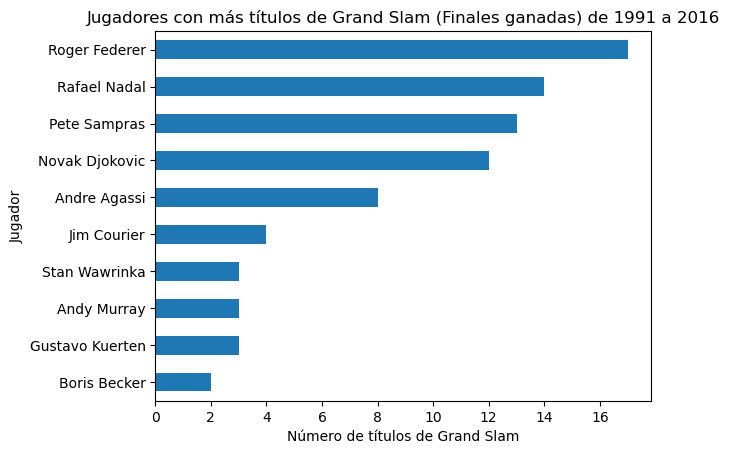

In [9]:
grand_slam_finals['winner_name'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Número de títulos de Grand Slam')
plt.ylabel('Jugador')
plt.title('Jugadores con más títulos de Grand Slam (Finales ganadas) de 1991 a 2016')
plt.gca().invert_yaxis()
plt.show()

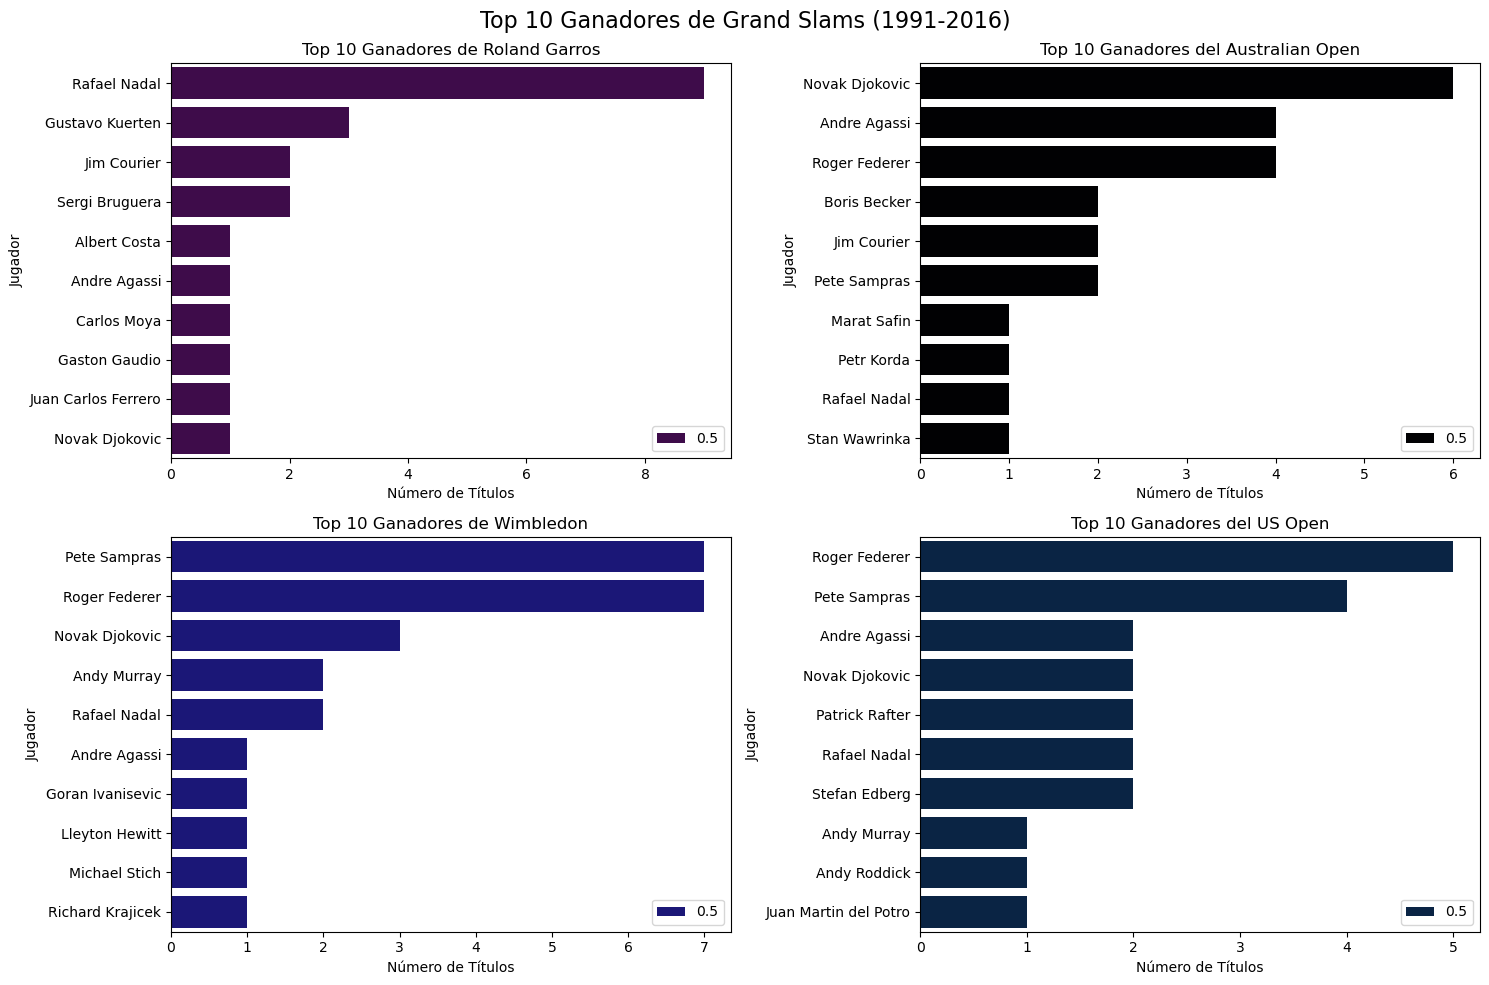

In [10]:
roland_garros = grand_slam_finals[grand_slam_finals['tourney_slug'] == 'roland-garros']
roland_garros_c = roland_garros.sort_values(by='year') 
roland_garros_c = roland_garros_c.groupby('winner_name').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

autralian_open = grand_slam_finals[grand_slam_finals['tourney_slug'] == 'australian-open']
autralian_open_c = autralian_open.sort_values(by='year')
autralian_open_c = autralian_open_c.groupby('winner_name').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

wimbledon= grand_slam_finals[grand_slam_finals['tourney_slug'] == 'wimbledon']
wimbledon_c = wimbledon.sort_values(by='year')
wimbledon_c = wimbledon_c.groupby('winner_name').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

us_open= grand_slam_finals[grand_slam_finals['tourney_slug'] == 'us-open']
us_open_c = us_open.sort_values(by='year') 
us_open_c = us_open_c.groupby('winner_name').size().reset_index(name='counts').sort_values(by='counts', ascending=False)


fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 10 Ganadores de Grand Slams (1991-2016)', fontsize=16)
sns.barplot(data=roland_garros_c.head(10), x='counts', y='winner_name', ax=ax[0, 0], palette='viridis' , hue=0.5)
ax[0, 0].set_title('Top 10 Ganadores de Roland Garros')
ax[0, 0].set_xlabel('Número de Títulos')
ax[0, 0].set_ylabel('Jugador')  

sns.barplot(data=autralian_open_c.head(10), x='counts', y='winner_name', ax=ax[0, 1], palette='magma', hue=0.5)
ax[0, 1].set_title('Top 10 Ganadores del Australian Open')
ax[0, 1].set_xlabel('Número de Títulos')
ax[0, 1].set_ylabel('Jugador')  

sns.barplot(data=wimbledon_c.head(10), x='counts', y='winner_name', ax=ax[1, 0], palette='plasma', hue=0.5)
ax[1, 0].set_title('Top 10 Ganadores de Wimbledon')
ax[1, 0].set_xlabel('Número de Títulos')
ax[1, 0].set_ylabel('Jugador')  

sns.barplot(data=us_open_c.head(10), x='counts', y='winner_name', ax=ax[1, 1], palette='cividis', hue=0.5)
ax[1, 1].set_title('Top 10 Ganadores del US Open')
ax[1, 1].set_xlabel('Número de Títulos')
ax[1, 1].set_ylabel('Jugador')  
plt.tight_layout()
plt.show()



## 2. Grafique, por cada Grand Slam, la cantidad de sets ganados por el ganador del torneo en función del año.

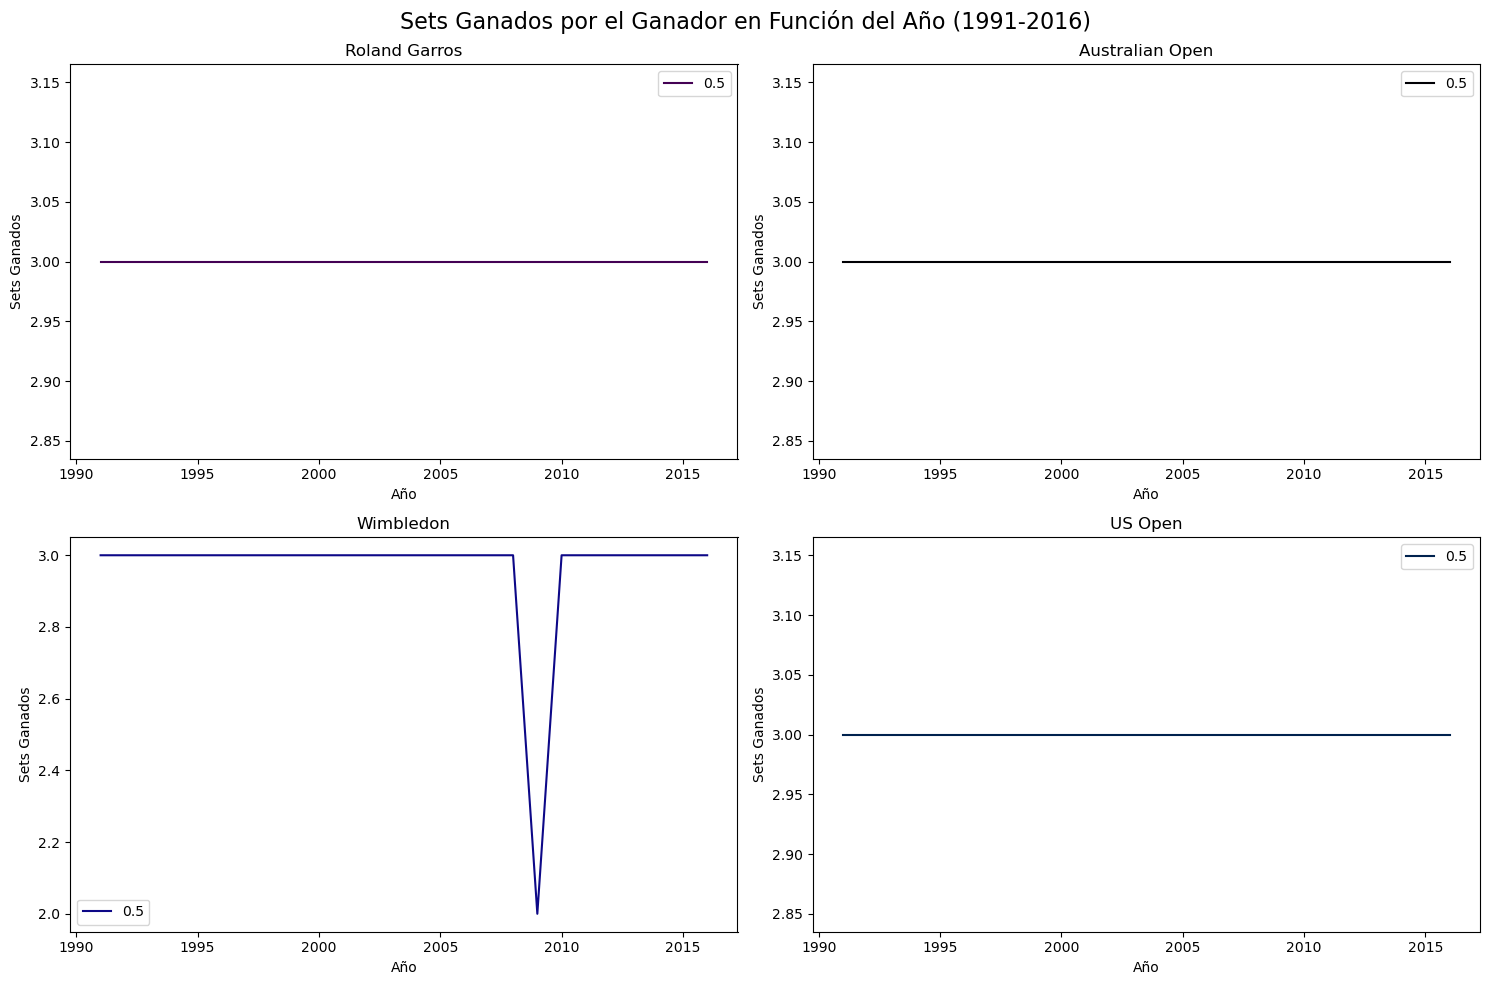

In [11]:
## 2. Grafique, por cada Grand Slam, la cantidad de sets ganados por el ganador del torneo en función del año.

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sets Ganados por el Ganador en Función del Año (1991-2016)', fontsize=16)

sns.lineplot(data=roland_garros, x='year', y='winner_sets_won', ax=ax[0, 0], palette='viridis', hue=0.5)
ax[0, 0].set_title('Roland Garros')
ax[0, 0].set_xlabel('Año')
ax[0, 0].set_ylabel('Sets Ganados')

sns.lineplot(data=autralian_open, x='year', y='winner_sets_won', ax=ax[0, 1], palette='magma', hue=0.5)
ax[0, 1].set_title('Australian Open')
ax[0, 1].set_xlabel('Año')
ax[0, 1].set_ylabel('Sets Ganados')

sns.lineplot(data=wimbledon, x='year', y='winner_sets_won', ax=ax[1, 0], palette='plasma', hue=0.5)
ax[1, 0].set_title('Wimbledon')
ax[1, 0].set_xlabel('Año')
ax[1, 0].set_ylabel('Sets Ganados') 

sns.lineplot(data=us_open, x='year', y='winner_sets_won', ax=ax[1, 1], palette='cividis', hue=0.5)
ax[1, 1].set_title('US Open')
ax[1, 1].set_xlabel('Año')
ax[1, 1].set_ylabel('Sets Ganados')
plt.tight_layout()
plt.show()

In [12]:
wimbledon[wimbledon['winner_sets_won'] != 3]

,tourney_slug,tourney_round_name,winner_name,loser_name,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,match_stats_url_suffix,year
62736,wimbledon,Finals,Roger Federer,Andy Roddick,2,2,22,25,/en/scores/2009/540/MS001/match-stats,2009


*los invito a revisar el partido de la final 2009. Probablemente el data set tiene un error, porque sí se ganaron 3 sets, pero el útlimo set fue 16-14. Uno de los sets más largos de la historia.* Puede que esto se haya interpretado como un tie-break, y por eso el conteo de sets es erróneo. Este tipo de exploraciones nos permite verificar la calidad de los datos. Y los errores pueden ser por muchas razones, desde errores humanos al ingresar los datos, hasta problemas en la recolección automática de los mismos. 

## 3. Grafique, por cada Grand Slam, la cantidad de juegos ganados por el ganador del torneo en función del año. 

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))

fig.suptitle('Juegos Ganados por el Ganador en Función del Año (1991-2016)', fontsize=16)
sns.barplot(data=roland_garros, x='year', y='winner_games_won', ax=ax[0, 0], palette='viridis', hue=0.5)
ax[0, 0].set_title('Roland Garros')
ax[0, 0].set_xlabel('Año')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
ax[0, 0].set_ylabel('Juegos Ganados')

sns.barplot(data=autralian_open, x='year', y='winner_games_won', ax=ax[0, 1], palette='magma', hue=0.5)
ax[0, 1].set_title('Australian Open')
ax[0, 1].set_xlabel('Año')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].set_ylabel('Juegos Ganados')

sns.barplot(data=wimbledon, x='year', y='winner_games_won', ax=ax[1, 0], palette='plasma', hue=0.5)
ax[1, 0].set_title('Wimbledon')
ax[1, 0].set_xlabel('Año')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].set_ylabel('Juegos Ganados')

sns.barplot(data=us_open, x='year', y='winner_games_won', ax=ax[1, 1], palette='cividis', hue=0.5)
ax[1, 1].set_title('US Open')
ax[1, 1].set_xlabel('Año')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].set_ylabel('Juegos Ganados')
plt.show()

## 4. Encuentre el/los jugadores, por Grand Slam, que hayan perdido menos juegos en la final.

In [20]:
# podemos buscarlos simplemente como : 


roland_min = roland_garros[roland_garros['loser_games_won'] == roland_garros['loser_games_won'].min()]
australia_min = autralian_open[autralian_open['loser_games_won'] == autralian_open['loser_games_won'].min()]
wimbledon_min = wimbledon[wimbledon['loser_games_won'] == wimbledon['loser_games_won'].min()]
usopen_min = us_open[us_open['loser_games_won'] == us_open['loser_games_won'].min()]

for df in [roland_min, australia_min, wimbledon_min, usopen_min]:
    if len(df) == 1:
        print(f"El jugador {df['winner_name'].values[0]} ganó el {df['tourney_slug'].values[0].replace('-', ' ').title()} en {df['year'].values[0]} y perdio solo {df['loser_games_won'].values[0]} juegos.")
        print("="*50)
    else:
        for index, row in df.iterrows():
            print(f"El jugador {row['winner_name']} ganó el {row['tourney_slug'].replace('-', ' ').title()} en {row['year']} y perdio solo {row['loser_games_won']} juegos.")

El jugador Rafael Nadal ganó el Roland Garros en 2008 y perdio solo 4 juegos.
El jugador Andre Agassi ganó el Australian Open en 2003 y perdio solo 5 juegos.
El jugador Lleyton Hewitt ganó el Wimbledon en 2002 y perdio solo 6 juegos.
El jugador Stefan Edberg ganó el Us Open en 1991 y perdio solo 6 juegos.
El jugador Roger Federer ganó el Us Open en 2004 y perdio solo 6 juegos.


/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_39494/3384268447.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_39494/3384268447.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_39494/3384268447.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_39494/3384268447.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e

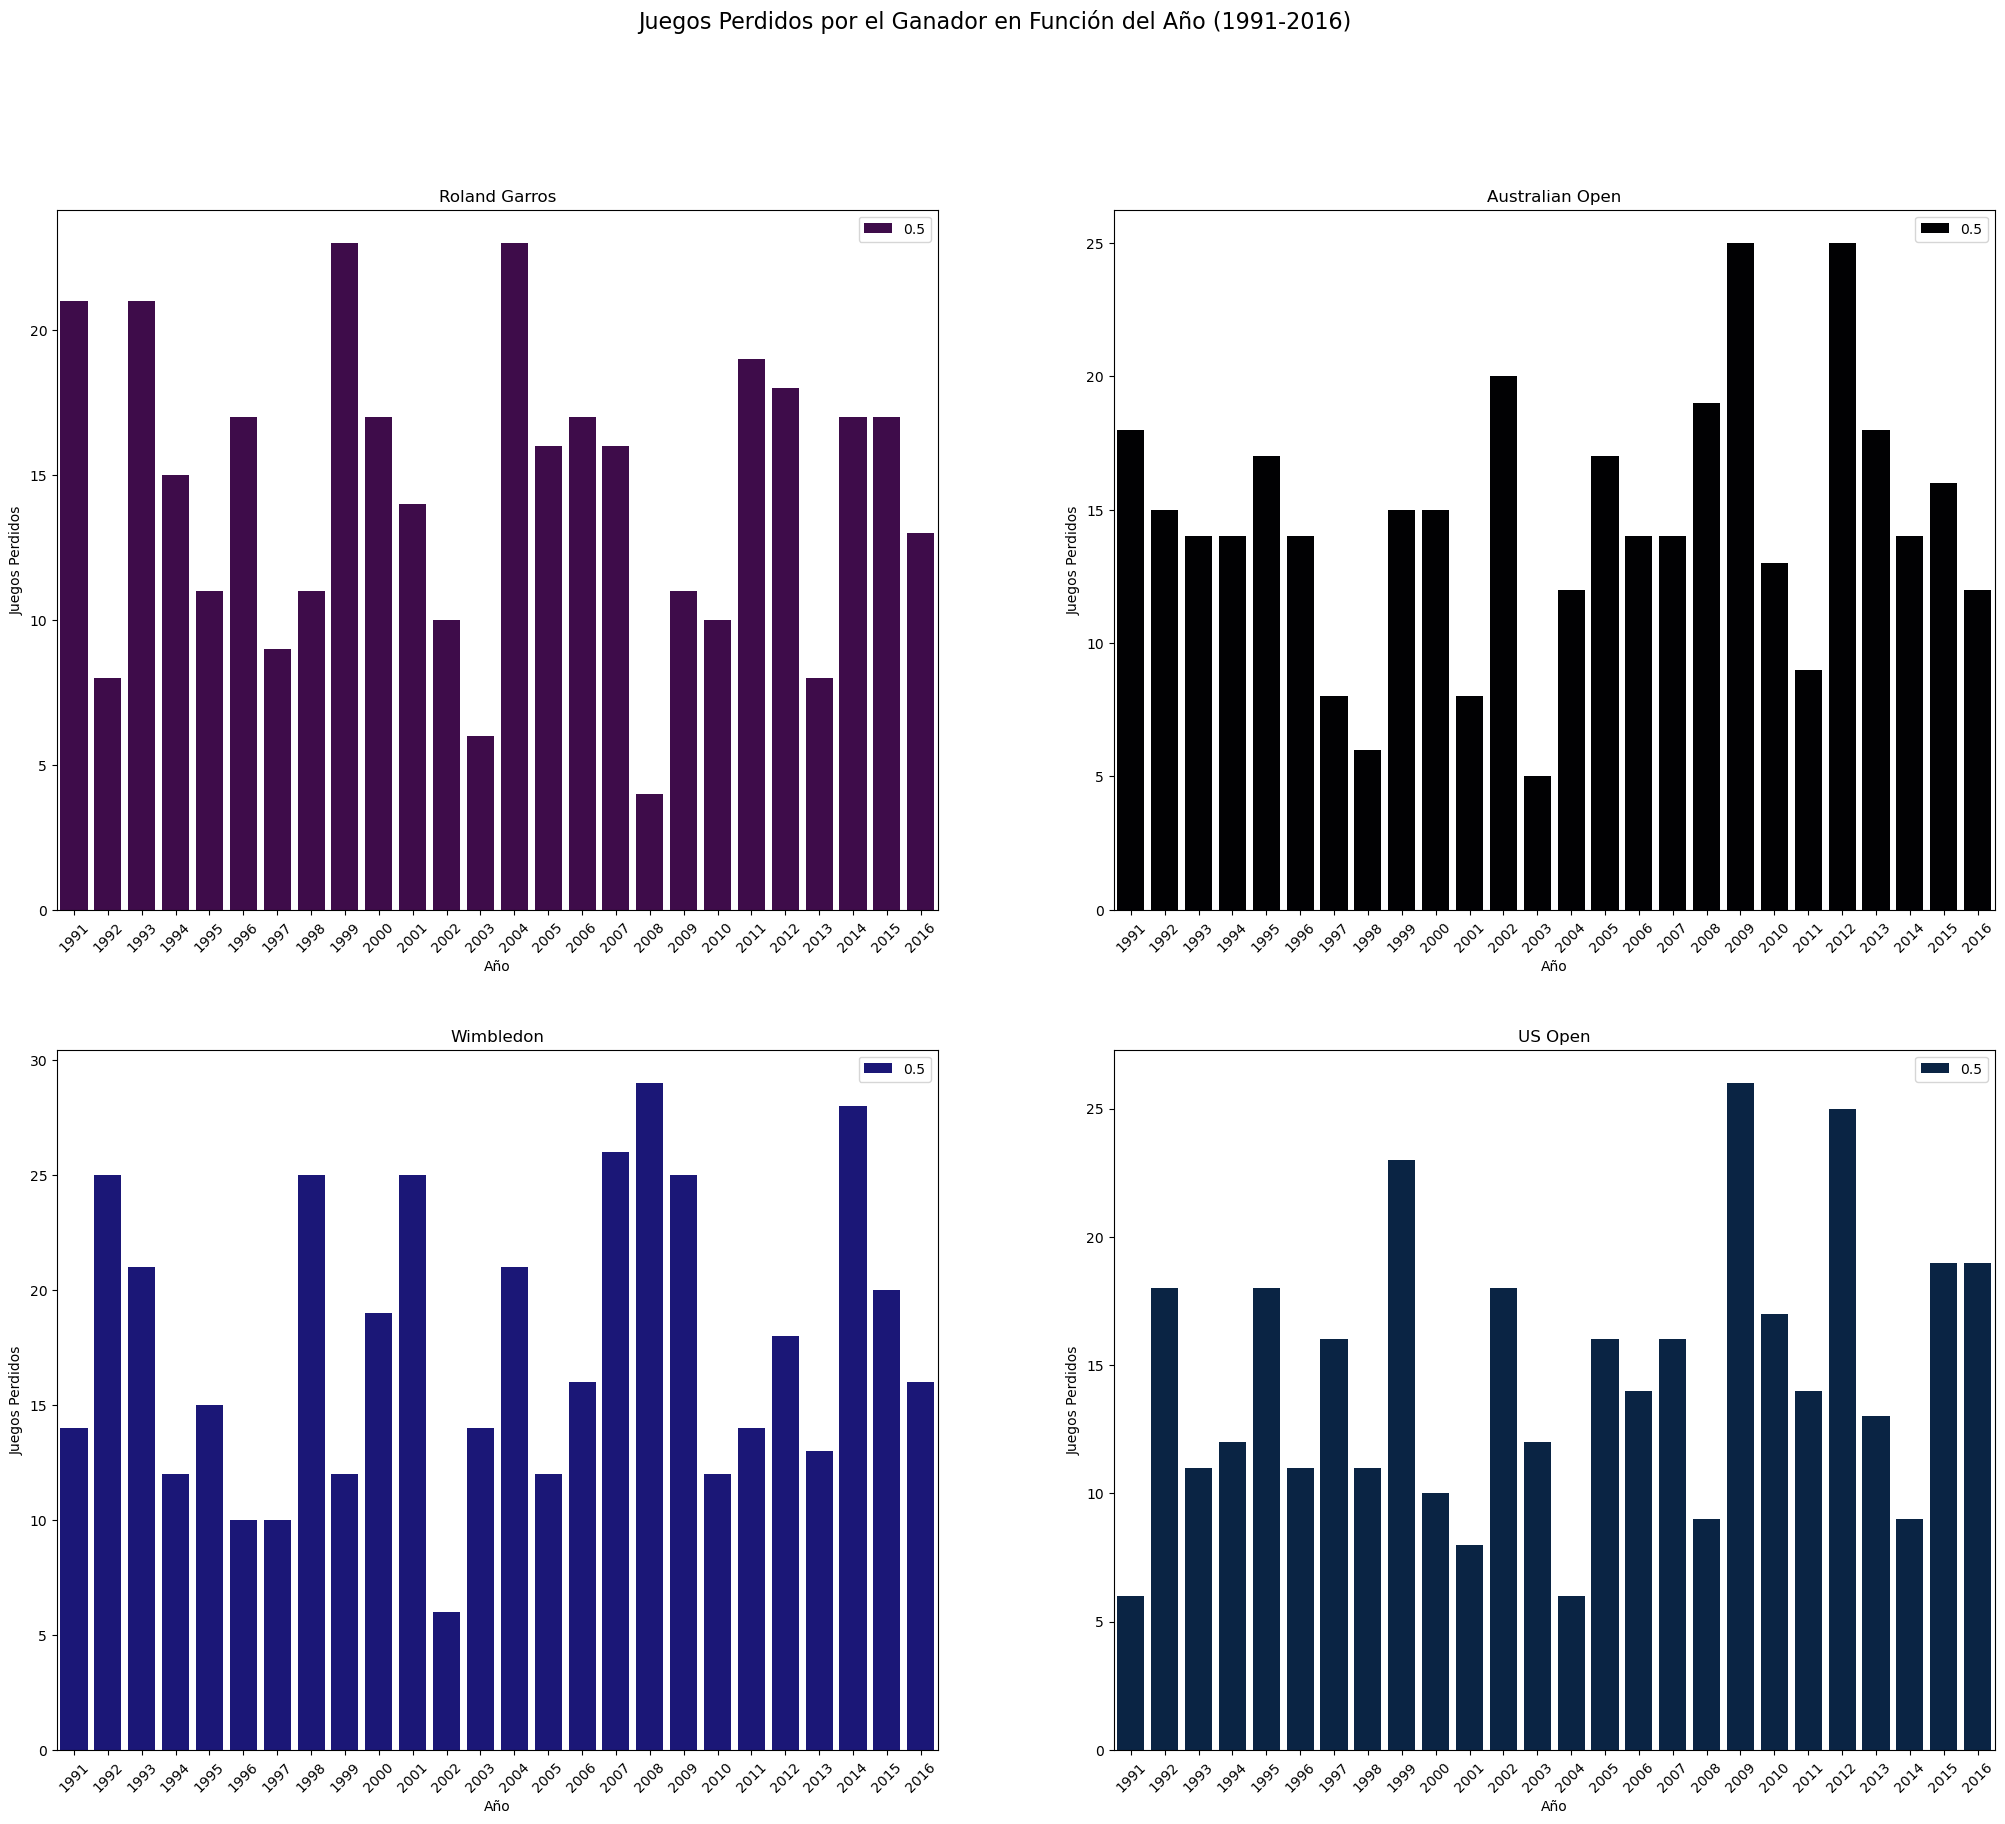

In [ ]:
# pero si nos queremos hacer una idea de como se comporta en general, podemos graficarlo:

fig, ax = plt.subplots(2, 2, figsize=(25, 20))
fig.suptitle('Juegos Perdidos por el Ganador en Función del Año (1991-2016)', fontsize=16)

sns.barplot(data=roland_garros, x='year', y='loser_games_won', ax=ax[0, 0], palette='viridis', hue=0.5)
ax[0, 0].set_title('Roland Garros')
ax[0, 0].set_xlabel('Año')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
ax[0, 0].set_ylabel('Juegos Perdidos')

sns.barplot(data=autralian_open, x='year', y='loser_games_won', ax=ax[0, 1], palette='magma', hue=0.5)
ax[0, 1].set_title('Australian Open')
ax[0, 1].set_xlabel('Año')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].set_ylabel('Juegos Perdidos')

sns.barplot(data=wimbledon, x='year', y='loser_games_won', ax=ax[1, 0], palette='plasma', hue=0.5)
ax[1, 0].set_title('Wimbledon')
ax[1, 0].set_xlabel('Año')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].set_ylabel('Juegos Perdidos')

sns.barplot(data=us_open, x='year', y='loser_games_won', ax=ax[1, 1], palette='cividis', hue=0.5)
ax[1, 1].set_title('US Open')
ax[1, 1].set_xlabel('Año')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].set_ylabel('Juegos Perdidos')
plt.show()

<section style="padding: 2rem; background: #979797ff; border-radius: 1rem; box-shadow: 0 2px 8px #0001; margin-bottom: 2rem;">
    <h2 style="color: #4b4d65ff; text-align: center; margin-bottom: 1.5rem;">
        PARTE 2
    </h2>
    <p style="font-size: 1.1rem; color: #222; margin-bottom: 1.2rem;">
        Ahora vamos a poner en práctica la unión de dataframes para encontrar información más específica. Debemos lograr lo siguiente:
    </p>
    <ol style="font-size: 1.08rem; color: #f3eaff; margin-left: 1.2rem;">
        <li style="margin-bottom: 0.7rem;">
            Obtenga un dataframe con la información de los jugadores obtenidos en <strong>(4)</strong> y guárdelo en un archivo <code>.txt</code>.
        </li>
        <li style="margin-bottom: 0.7rem;">
            Obtenga el dataframe con la información de los jugadores que han ganado  3 o más Grand Slams en el período de tiempo cubierto por los datos.
        </li>
        <li style="margin-bottom: 0.7rem;">
            ¿Cuál es el peso y altura promedio de los campeones de Grand Slam?
        </li>
    </ol>
    <div style="background: #646464ff; border-radius: 0.5rem; padding: 1rem 1.5rem; border-left: 4px solid #2d2b56ff; margin-bottom: 1.2rem; width: 70%;">
        <strong>Extras:</strong>
        <ul style="margin-top: 0.5rem; margin-bottom: 0;">
            <li>¿Quién fue el jugador más joven en ganar un Grand Slam?</li>
            <li>¿Y el más viejo?</li>
        </ul>
    </div>
</section>



In [ ]:
# primero cargamos los datos de los jugadores
players = pd.read_csv("players.csv")
players.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


## 1 Informacion de los jugadores obtenidos en (4) y guárdelo en un archivo .txt. 



In [21]:
# primero fijemonos que el formato de los nombres es distinto, pero lo arreglamos facilmente: 
players["full_name"] = players['first_name'] + ' ' + players['last_name']
players.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,...,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand,full_name
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,...,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN,Ricardo Acuna
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,...,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN,Sadiq Abdullahi
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,...,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN,Nelson Aerts
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,...,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN,Egan Adams
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,...,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN,Ronald Agenor


In [30]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912 entries, 0 to 10911
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      10912 non-null  object 
 1   player_slug    10912 non-null  object 
 2   first_name     10912 non-null  object 
 3   last_name      10912 non-null  object 
 4   player_url     10912 non-null  object 
 5   flag_code      8727 non-null   object 
 6   residence      2014 non-null   object 
 7   birthplace     3038 non-null   object 
 8   birthdate      5114 non-null   object 
 9   birth_year     5114 non-null   float64
 10  birth_month    5114 non-null   float64
 11  birth_day      5114 non-null   float64
 12  turned_pro     1533 non-null   float64
 13  weight_lbs     2706 non-null   float64
 14  weight_kg      2706 non-null   float64
 15  height_ft      2658 non-null   object 
 16  height_inches  2658 non-null   float64
 17  height_cm      2658 non-null   float64
 18  handed

In [25]:
# ahora podemos hacer el merge con los datos de (4) 
ganadores_ejercicio_4 = pd.concat([roland_min, australia_min, wimbledon_min, usopen_min])
ganadores_ejercicio_4

,tourney_slug,tourney_round_name,winner_name,loser_name,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,match_stats_url_suffix,year
57751,roland-garros,Finals,Rafael Nadal,Roger Federer,3,0,18,4,/en/scores/2008/520/MS001/match-stats,2008
39532,australian-open,Finals,Andre Agassi,Rainer Schuettler,3,0,18,5,/en/scores/2003/580/MS001/match-stats,2003
38040,wimbledon,Finals,Lleyton Hewitt,David Nalbandian,3,0,18,6,/en/scores/2002/540/MS001/match-stats,2002
2474,us-open,Finals,Stefan Edberg,Jim Courier,3,0,18,6,/en/scores/1991/560/MS001/match-stats,1991
44545,us-open,Finals,Roger Federer,Lleyton Hewitt,3,0,19,6,/en/scores/2004/560/MS001/match-stats,2004


In [29]:
# ahora hacemos el merge con players - 

mejores_ganadores = pd.merge(ganadores_ejercicio_4, players, left_on='winner_name', right_on='full_name', how="inner")
mejores_ganadores

,tourney_slug,tourney_round_name,winner_name,loser_name,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,match_stats_url_suffix,year,...,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand,full_name
0,roland-garros,Finals,Rafael Nadal,Roger Federer,3,0,18,4,/en/scores/2008/520/MS001/match-stats,2008,...,3.0,2001.0,188.0,85.0,"6'1""",73.0,185.0,Left-Handed,Two-Handed Backhand,Rafael Nadal
1,australian-open,Finals,Andre Agassi,Rainer Schuettler,3,0,18,5,/en/scores/2003/580/MS001/match-stats,2003,...,29.0,1986.0,177.0,80.0,"5'11""",71.0,180.0,Right-Handed,Two-Handed Backhand,Andre Agassi
2,wimbledon,Finals,Lleyton Hewitt,David Nalbandian,3,0,18,6,/en/scores/2002/540/MS001/match-stats,2002,...,24.0,1998.0,170.0,77.0,"5'10""",70.0,178.0,Right-Handed,Two-Handed Backhand,Lleyton Hewitt
3,us-open,Finals,Stefan Edberg,Jim Courier,3,0,18,6,/en/scores/1991/560/MS001/match-stats,1991,...,19.0,1983.0,170.0,77.0,"6'2""",74.0,188.0,NaN,NaN,Stefan Edberg
4,us-open,Finals,Roger Federer,Lleyton Hewitt,3,0,19,6,/en/scores/2004/560/MS001/match-stats,2004,...,8.0,1998.0,187.0,85.0,"6'1""",73.0,185.0,Right-Handed,One-Handed Backhand,Roger Federer


In [35]:
# guadraos en un archivo .txt 

with open("player_4.txt", "w") as f: 
    for i, row in mejores_ganadores.iterrows():
        f.write(f"Nombre: {row['full_name']}\n")
        f.write(f"Nacionalidad: {row['flag_code']}\n")
        f.write(f"Fecha de Nacimiento: {row['birthdate'].replace('.', '/')}\n")
        f.write(f"Inicio de Carrera: {int(row['turned_pro'])}\n")
        f.write(f"Altura: {row['height_cm']}\n")
        f.write(f"Peso: {row['weight_kg']}\n")
        f.write(f"Mano Hábil: {row['handedness']}\n")
        f.write("="*90 + "\n\n")

## 2. Obtenga el dataframe con la información de los jugadores que han ganado 3 o más Grand Slams en el período de tiempo cubierto por los datos.

In [36]:
# ocuparemos el data frame que ocupamos al principio 

grand_slam_finals.head()

,tourney_slug,tourney_round_name,winner_name,loser_name,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,match_stats_url_suffix,year
124,australian-open,Finals,Boris Becker,Ivan Lendl,3,1,19,18,/en/scores/1991/580/MS001/match-stats,1991
1393,roland-garros,Finals,Jim Courier,Andre Agassi,3,2,23,21,/en/scores/1991/520/MS001/match-stats,1991
2474,us-open,Finals,Stefan Edberg,Jim Courier,3,0,18,6,/en/scores/1991/560/MS001/match-stats,1991
1699,wimbledon,Finals,Michael Stich,Boris Becker,3,0,19,14,/en/scores/1991/540/MS001/match-stats,1991
3486,australian-open,Finals,Jim Courier,Stefan Edberg,3,1,21,15,/en/scores/1992/580/MS001/match-stats,1992


In [37]:
# agrupamos nuevamente por ganador y luego filtramos 

top_ganadores = grand_slam_finals.groupby('winner_name').size().reset_index(name='counts') 
top_ganadores = top_ganadores[top_ganadores['counts'] >= 3]
top_ganadores

,winner_name,counts
1,Andre Agassi,8
2,Andy Murray,3
8,Gustavo Kuerten,3
9,Jim Courier,4
16,Novak Djokovic,12
18,Pete Sampras,13
20,Rafael Nadal,14
22,Roger Federer,17
24,Stan Wawrinka,3


In [38]:
# ahora podemos buscar la informacion de los jugadores que ganaron mas finales:
ganadores_info = pd.merge(top_ganadores, players, left_on='winner_name', right_on='full_name', how="inner")
ganadores_info

,winner_name,counts,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,...,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand,full_name
0,Andre Agassi,8,a092,andre-agassi,Andre,Agassi,http://www.atpworldtour.com/en/players/andre-a...,USA,"Las Vegas, Nevada, USA","Las Vegas, Nevada, USA",...,29.0,1986.0,177.0,80.0,"5'11""",71.0,180.0,Right-Handed,Two-Handed Backhand,Andre Agassi
1,Andy Murray,3,mc10,andy-murray,Andy,Murray,http://www.atpworldtour.com/en/players/andy-mu...,GBR,"London, England","Glasgow, Scotland",...,15.0,2005.0,185.0,84.0,"6'3""",75.0,191.0,Right-Handed,Two-Handed Backhand,Andy Murray
2,Gustavo Kuerten,3,k293,gustavo-kuerten,Gustavo,Kuerten,http://www.atpworldtour.com/en/players/gustavo...,BRA,"Florianopolis, Brazil","Florianopolis, Brazil",...,10.0,1995.0,183.0,83.0,"6'3""",75.0,191.0,Right-Handed,One-Handed Backhand,Gustavo Kuerten
3,Jim Courier,4,c243,jim-courier,Jim,Courier,http://www.atpworldtour.com/en/players/jim-cou...,USA,"Orlando, Florida, USA","Sanford, Florida, USA",...,17.0,1988.0,182.0,83.0,"6'1""",73.0,185.0,NaN,NaN,Jim Courier
4,Novak Djokovic,12,d643,novak-djokovic,Novak,Djokovic,http://www.atpworldtour.com/en/players/novak-d...,SRB,"Monte Carlo, Monaco","Belgrade, Serbia",...,22.0,2003.0,170.0,77.0,"6'2""",74.0,188.0,Right-Handed,Two-Handed Backhand,Novak Djokovic
5,Pete Sampras,13,s402,pete-sampras,Pete,Sampras,http://www.atpworldtour.com/en/players/pete-sa...,USA,"Los Angeles, California, USA","Washington, D.C., USA",...,12.0,1988.0,170.0,77.0,"6'1""",73.0,185.0,Right-Handed,One-Handed Backhand,Pete Sampras
6,Rafael Nadal,14,n409,rafael-nadal,Rafael,Nadal,http://www.atpworldtour.com/en/players/rafael-...,ESP,"Manacor, Mallorca, Spain","Manacor, Mallorca, Spain",...,3.0,2001.0,188.0,85.0,"6'1""",73.0,185.0,Left-Handed,Two-Handed Backhand,Rafael Nadal
7,Roger Federer,17,f324,roger-federer,Roger,Federer,http://www.atpworldtour.com/en/players/roger-f...,SUI,Switzerland,"Basel, Switzerland",...,8.0,1998.0,187.0,85.0,"6'1""",73.0,185.0,Right-Handed,One-Handed Backhand,Roger Federer
8,Stan Wawrinka,3,w367,stan-wawrinka,Stan,Wawrinka,http://www.atpworldtour.com/en/players/stan-wa...,SUI,"St. Barthelemy, Switzerland","Lausanne, Switzerland",...,28.0,2002.0,179.0,81.0,"6'0""",72.0,183.0,Right-Handed,One-Handed Backhand,Stan Wawrinka


<div style="background: #fffbe6; border-left: 8px solid #ffe066; border-radius: 0.7rem; padding: 1.5rem 2rem; margin: 2rem 0; display: flex; align-items: flex-start; box-shadow: 0 2px 8px #0001; font-family: 'VT323', 'Fira Mono', 'Consolas', monospace; font-size: 1.25rem; width: 90%;">
    <img src="warn.png" alt="Advertencia" style="width: 10rem; height: 10rem; margin-right: 1.5rem;">
    <div>
        <span style="color: #d7263d; font-weight: bold; font-size: 1.3em;">...</span><br>
        <span STYLE="color: #333;"  >
            Estamos haciendo uniones y comparaciones más o menos sencillas. Consideren que en un escenario de prueba puede ser algo similar, pero llegar a preguntarnos algo más específico sobre los datos que cruzamos. Quizá información que no está textual en los datos, pero que debemos analizar y reflexionar [ o elocubrar], siempre y cuando tengamos algún tipo de respaldo en la información que hemos ido obteniendo. Recuerden que, en realidad, todos estos procedimientos están en función de una pregunta <b style="color: #d7263d;">real</b> y eso es lo que buscamos resolver.
        </span>
    </div>
</div>
<link href="https://fonts.googleapis.com/css2?family=VT323&display=swap" rel="stylesheet">

## 3 ¿Cuál es el peso y altura promedio de los campeones de Grand Slam? 

In [ ]:
# tomemos nuevamente la informacion que guardamos
# por esto es relevante que guardemos los datos que vamos obteniendo [con nombres coherentes y que nos ayuden a recordar que contienen]

grand_slam_finals.head()

,tourney_slug,tourney_round_name,winner_name,loser_name,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,match_stats_url_suffix,year
124,australian-open,Finals,Boris Becker,Ivan Lendl,3,1,19,18,/en/scores/1991/580/MS001/match-stats,1991
1393,roland-garros,Finals,Jim Courier,Andre Agassi,3,2,23,21,/en/scores/1991/520/MS001/match-stats,1991
2474,us-open,Finals,Stefan Edberg,Jim Courier,3,0,18,6,/en/scores/1991/560/MS001/match-stats,1991
1699,wimbledon,Finals,Michael Stich,Boris Becker,3,0,19,14,/en/scores/1991/540/MS001/match-stats,1991
3486,australian-open,Finals,Jim Courier,Stefan Edberg,3,1,21,15,/en/scores/1992/580/MS001/match-stats,1992


In [40]:
# hacemos el merge con players para obtener la informacion de los ganadores 
all_winners_info = pd.merge(grand_slam_finals, players, left_on='winner_name', right_on='full_name', how="inner")
all_winners_info.head()

,tourney_slug,tourney_round_name,winner_name,loser_name,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,match_stats_url_suffix,year,...,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand,full_name
0,australian-open,Finals,Boris Becker,Ivan Lendl,3,1,19,18,/en/scores/1991/580/MS001/match-stats,1991,...,22.0,1984.0,187.0,85.0,"6'3""",75.0,191.0,NaN,NaN,Boris Becker
1,roland-garros,Finals,Jim Courier,Andre Agassi,3,2,23,21,/en/scores/1991/520/MS001/match-stats,1991,...,17.0,1988.0,182.0,83.0,"6'1""",73.0,185.0,NaN,NaN,Jim Courier
2,us-open,Finals,Stefan Edberg,Jim Courier,3,0,18,6,/en/scores/1991/560/MS001/match-stats,1991,...,19.0,1983.0,170.0,77.0,"6'2""",74.0,188.0,NaN,NaN,Stefan Edberg
3,wimbledon,Finals,Michael Stich,Boris Becker,3,0,19,14,/en/scores/1991/540/MS001/match-stats,1991,...,18.0,1988.0,175.0,79.0,"6'4""",76.0,193.0,Right-Handed,One-Handed Backhand,Michael Stich
4,australian-open,Finals,Jim Courier,Stefan Edberg,3,1,21,15,/en/scores/1992/580/MS001/match-stats,1992,...,17.0,1988.0,182.0,83.0,"6'1""",73.0,185.0,NaN,NaN,Jim Courier


In [41]:
all_winners_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tourney_slug            104 non-null    object 
 1   tourney_round_name      104 non-null    object 
 2   winner_name             104 non-null    object 
 3   loser_name              104 non-null    object 
 4   winner_sets_won         104 non-null    int64  
 5   loser_sets_won          104 non-null    int64  
 6   winner_games_won        104 non-null    int64  
 7   loser_games_won         104 non-null    int64  
 8   match_stats_url_suffix  102 non-null    object 
 9   year                    104 non-null    int64  
 10  player_id               104 non-null    object 
 11  player_slug             104 non-null    object 
 12  first_name              104 non-null    object 
 13  last_name               104 non-null    object 
 14  player_url              104 non-null    ob

In [42]:
# vemos que no hay datos nulos en height_cm y weight_kg asi que podemos calcular el promedio directamente: 
all_winners_info[['height_cm', 'weight_kg']].mean()


height_cm    186.009615
weight_kg     81.567308
dtype: float64

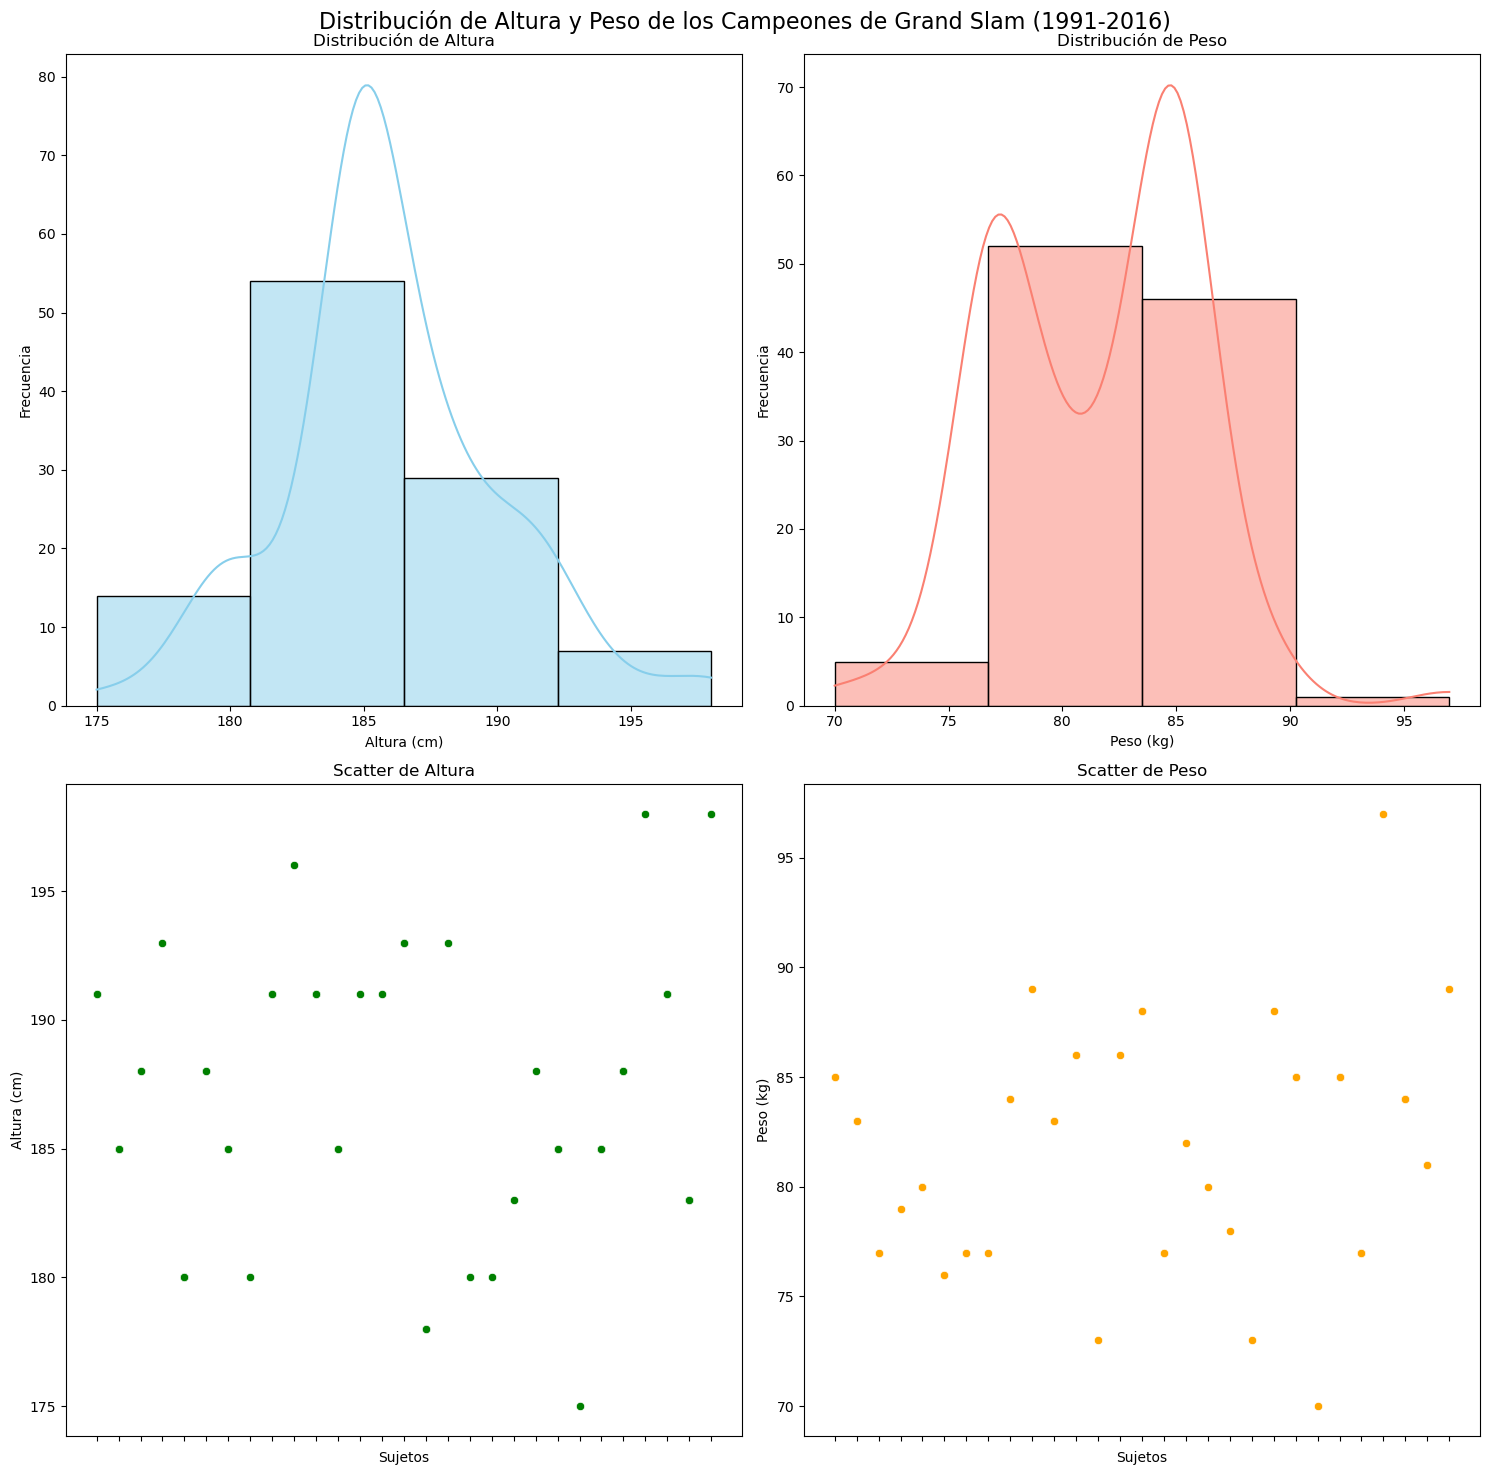

In [53]:
# tambien nos podrian pedir la distribucion de alturas y pesos: 
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Distribución de Altura y Peso de los Campeones de Grand Slam (1991-2016)', fontsize=16)
sns.histplot(all_winners_info['height_cm'], bins=4, kde=True, color='skyblue', ax=ax[0,0])
ax[0,0].set_title('Distribución de Altura')
ax[0,0].set_xlabel('Altura (cm)')
ax[0,0].set_ylabel('Frecuencia')

sns.histplot(all_winners_info['weight_kg'], bins=4, kde=True, color='salmon', ax=ax[0,1])
ax[0,1].set_title('Distribución de Peso')
ax[0,1].set_xlabel('Peso (kg)')
ax[0,1].set_ylabel('Frecuencia')

# podemos jugar con los bins para ver mejor la distribucion
sns.scatterplot(x=all_winners_info['winner_name'], y=all_winners_info['height_cm'], color='green', ax=ax[1,0])
ax[1,0].set_title('Scatter de Altura')
ax[1,0].set_xlabel('Sujetos')
ax[1,0].set_ylabel('Altura (cm)') 

sns.scatterplot(x=all_winners_info['winner_name'], y=all_winners_info['weight_kg'], color='orange', ax=ax[1,1])
ax[1,1].set_title('Scatter de Peso')
ax[1,1].set_xlabel('Sujetos')
ax[1,1].set_ylabel('Peso (kg)')
ax[1,0].set_xticklabels([])
ax[1,1].set_xticklabels([])
plt.tight_layout()




plt.show()

# el parametro kde=True nos ayuda a ver la "curva" de distribucion, pero no es estrictamente necesario 

## EXTRAS : A desarrollar por ustedes.